IMPORTING THE IMDB DATA SET

In [26]:
import tensorflow
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

 
train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])

9999

Decoding reviews back to next

In [27]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

**Preparing the data**

Encoding the integer sequences via multi hot encoding

In [28]:

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

# vectorizing the training data an test data

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#Vector form train data set
x_train[0]

# labeling the vectorized data
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

*Building* *the* *model*

In [29]:

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**compiling the model**

In [30]:

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])


**Validating your approach**

In [31]:

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]

partial_y_train = y_train[10000:]


In [32]:

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 62ms/step - loss: 0.5436 - accuracy: 0.7761 - val_loss: 0.4163 - val_accuracy: 0.8613
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3426 - accuracy: 0.8871 - val_loss: 0.3293 - val_accuracy: 0.8755
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2558 - accuracy: 0.9144 - val_loss: 0.2889 - val_accuracy: 0.8870
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2073 - accuracy: 0.9290 - val_loss: 0.2839 - val_accuracy: 0.8865
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1738 - accuracy: 0.9425 - val_loss: 0.2750 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1505 - accuracy: 0.9504 - val_loss: 0.2826 - val_accuracy: 0.8855
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1279 - accuracy: 0.9589 - val_loss: 0.3191 - val_accuracy: 0.8758
Epoch 8/20
30

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**ploting the training and validation loss**

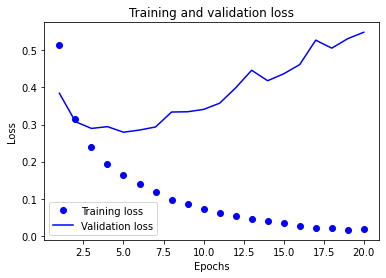

In [11]:

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**plot accuracy of traning and validation sets**

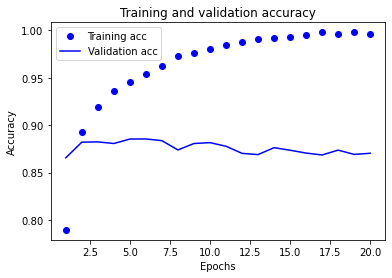

In [12]:

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [33]:
#Retrainig model from scratch 

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/2
49/49 [==============================] - 2s 21ms/step - loss: 0.4576 - accuracy: 0.8178
Epoch 2/2
782/782 [==============================] - 4s 5ms/step - loss: 0.3002 - accuracy: 0.8795


[0.30016928911209106, 0.8794800043106079]


we can see the test accuracy 0.8795 on  which means model is working good with minimum loss 




Epoch 1/20
30/30 [==============================] - 3s 58ms/step - loss: 0.1636 - accuracy: 0.7747 - val_loss: 0.1114 - val_accuracy: 0.8598
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0863 - accuracy: 0.8937 - val_loss: 0.0976 - val_accuracy: 0.8643
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0626 - accuracy: 0.9208 - val_loss: 0.0860 - val_accuracy: 0.8822
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0478 - accuracy: 0.9407 - val_loss: 0.1150 - val_accuracy: 0.8468
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0403 - accuracy: 0.9497 - val_loss: 0.0967 - val_accuracy: 0.8778
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0319 - accuracy: 0.9639 - val_loss: 0.0925 - val_accuracy: 0.8815
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0329 - accuracy: 0.9601 - val_loss: 0.0954 - val_accuracy: 0.8792
Epoch 8/20
30

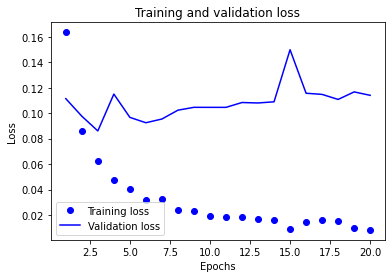

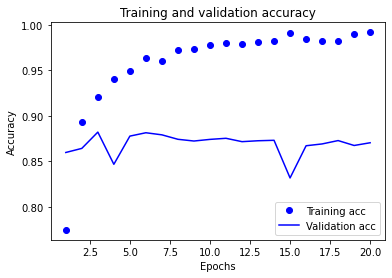

Epoch 1/2
49/49 [==============================] - 2s 18ms/step - loss: 0.1399 - accuracy: 0.8048
Epoch 2/2
782/782 [==============================] - 3s 4ms/step - loss: 0.0945 - accuracy: 0.8714


[0.0945201963186264, 0.8714399933815002]

In [35]:
#Tuning parameters changed as three layers and 16 neurons and tanh activation with mse loss function
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

#compiling the model
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

#validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#training
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#ploting the results training and validation
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#plot accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Retrainig model from scratch 

model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)
results

##As we can observe that the validation accuracy of the model decreased to 0.87

Epoch 1/20
30/30 [==============================] - 6s 159ms/step - loss: 0.1645 - accuracy: 0.7610 - val_loss: 0.1340 - val_accuracy: 0.8106
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0871 - accuracy: 0.8827 - val_loss: 0.0879 - val_accuracy: 0.8798
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0612 - accuracy: 0.9216 - val_loss: 0.0873 - val_accuracy: 0.8834
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0553 - accuracy: 0.9265 - val_loss: 0.0847 - val_accuracy: 0.8865
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0439 - accuracy: 0.9447 - val_loss: 0.0882 - val_accuracy: 0.8839
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0337 - accuracy: 0.9582 - val_loss: 0.1014 - val_accuracy: 0.8707
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0344 - accuracy: 0.9573 - val_loss: 0.0978 - val_accuracy: 0.8761
Epoch 8/20
3

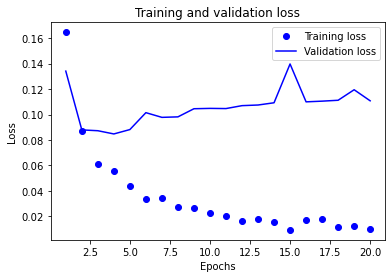

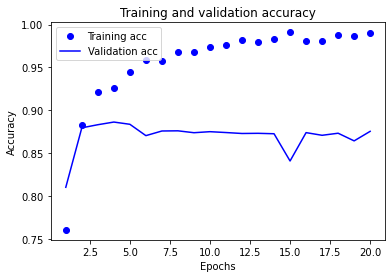

Epoch 1/2
49/49 [==============================] - 3s 32ms/step - loss: 0.1412 - accuracy: 0.7992
Epoch 2/2
782/782 [==============================] - 3s 4ms/step - loss: 0.0856 - accuracy: 0.8853


[0.08557754009962082, 0.8853200078010559]

In [36]:
#Applying the  three hideen layers to the modelwith 32 nuerins
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

#compiling the model
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

#validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#training
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#ploting the results training and validation
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#plot accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Retrainig model from scratch 

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/20
30/30 [==============================] - 5s 105ms/step - loss: 0.1627 - accuracy: 0.7586 - val_loss: 0.1329 - val_accuracy: 0.8117
Epoch 2/20
30/30 [==============================] - 1s 50ms/step - loss: 0.0866 - accuracy: 0.8837 - val_loss: 0.1315 - val_accuracy: 0.8188
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0667 - accuracy: 0.9115 - val_loss: 0.0847 - val_accuracy: 0.8848
Epoch 4/20
30/30 [==============================] - 2s 59ms/step - loss: 0.0567 - accuracy: 0.9278 - val_loss: 0.0872 - val_accuracy: 0.8818
Epoch 5/20
30/30 [==============================] - 2s 56ms/step - loss: 0.0477 - accuracy: 0.9391 - val_loss: 0.0887 - val_accuracy: 0.8835
Epoch 6/20
30/30 [==============================] - 2s 54ms/step - loss: 0.0430 - accuracy: 0.9457 - val_loss: 0.0917 - val_accuracy: 0.8814
Epoch 7/20
30/30 [==============================] - 2s 53ms/step - loss: 0.0351 - accuracy: 0.9567 - val_loss: 0.0951 - val_accuracy: 0.8781
Epoch 8/20
3

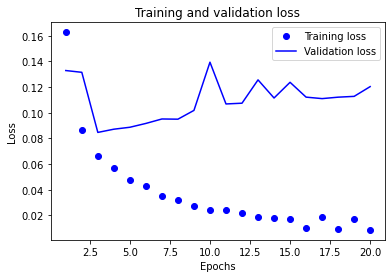

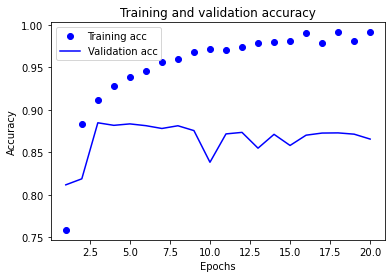

Epoch 1/2
49/49 [==============================] - 3s 37ms/step - loss: 0.1431 - accuracy: 0.7960
Epoch 2/2
782/782 [==============================] - 4s 4ms/step - loss: 0.0840 - accuracy: 0.8852


[0.08397051692008972, 0.885200023651123]

In [47]:
# tuning parameters with three layers with 64 neurons activation fucntion tanh and mse loss function
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

#compiling the model
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

#validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#training
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#ploting the results training and validation
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#plot accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Retrainig model from scratch 

model = keras.Sequential([
    layers.Dense(64, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/20
30/30 [==============================] - 7s 86ms/step - loss: 0.6130 - accuracy: 0.6765 - val_loss: 0.4838 - val_accuracy: 0.8420
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4308 - accuracy: 0.8363 - val_loss: 0.3532 - val_accuracy: 0.8749
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3277 - accuracy: 0.8803 - val_loss: 0.2958 - val_accuracy: 0.8851
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2632 - accuracy: 0.9083 - val_loss: 0.2754 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2163 - accuracy: 0.9259 - val_loss: 0.2713 - val_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1828 - accuracy: 0.9397 - val_loss: 0.2776 - val_accuracy: 0.8884
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1525 - accuracy: 0.9503 - val_loss: 0.2840 - val_accuracy: 0.8882
Epoch 8/20
30

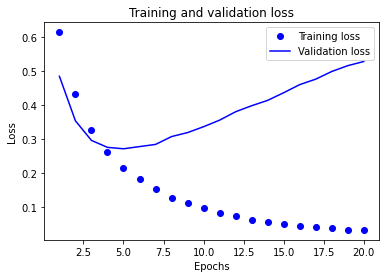

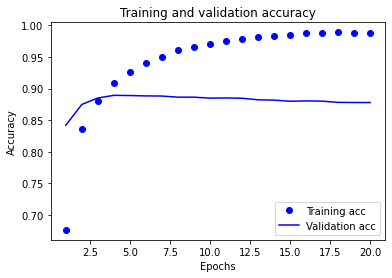

Epoch 1/4
49/49 [==============================] - 2s 16ms/step - loss: 0.5635 - accuracy: 0.7261
Epoch 2/4
49/49 [==============================] - 1s 16ms/step - loss: 0.3514 - accuracy: 0.8663
Epoch 3/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2704 - accuracy: 0.8997
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.2800 - accuracy: 0.8882


[0.2799670100212097, 0.8882399797439575]

In [53]:
# tuning parameters with three layers activation fucntion tanh and mse loss function adding drop out method to the model 
# to regularize and to increase the model perfomance 

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
 layers.Dropout(0.5),
 layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
 ])

#compiling the model
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#training
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

#ploting the results training and validation
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


#plot accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Retrainig model from scratch 

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
     layers.Dropout(0.5),
    
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results